In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import numpy as np

import os

from numpy import polyfit,polyval

from nonLinCorr import *
import psana

In [3]:
run=101
ds_str = 'exp=cxilr6716:run=%d:smd' % run
ds = psana.MPIDataSource(ds_str)
events = ds.events()
cspad = psana.Detector('CxiDs2.0:Cspad.0')
P = np.load('/reg/d/psdm/cxi/cxilr6716/scratch/derm/poly_data.npy')
polar_correct = np.load('/reg/d/psdm/cxi/cxilr6716/scratch/derm/polarization_-400encode.npy')

img_correct=None
img_mean = None
for ii,evt in enumerate(events):
    img = cspad.image(evt)
    polar_correct = np.load('/reg/d/psdm/cxi/cxilr6716/scratch/derm/polarization_-400encode.npy')
    Gain = img*img*P[:,:,0] + img*P[:,:,1] + P[:,:,2]
    img/=polar_correct
    if img_correct is None:
        img_correct = img * Gain
        img_mean = img
    else:
        img_correct += img*Gain
        img_mean+=img
    if ii>0:
        break
img_correct/=(ii+1)
img_mean/=(ii+1)
    

In [16]:
f=h5py.File('/reg/d/psdm/cxi/cxilr6716/scratch/cali_polar_data/run101_0.h5','r')
img_correct2 = f['corrected_imgs'][0]

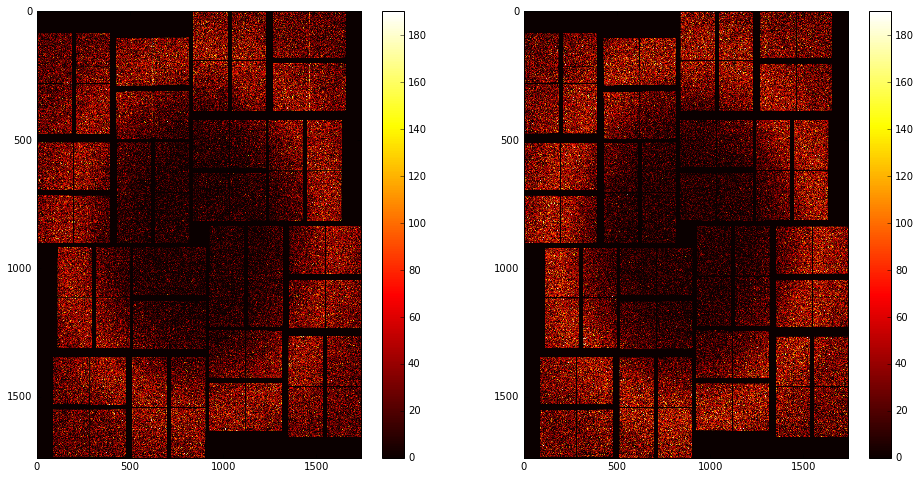

In [17]:
plt.figure(figsize=[16,8])
plt.subplot(121)
plt.imshow( img, 
         aspect='auto', cmap='hot',vmin=0,vmax=190)
plt.colorbar()

plt.subplot(122)
plt.imshow( img_correct2, 
         aspect='auto', cmap='hot',vmin=0,vmax=190)
plt.colorbar()

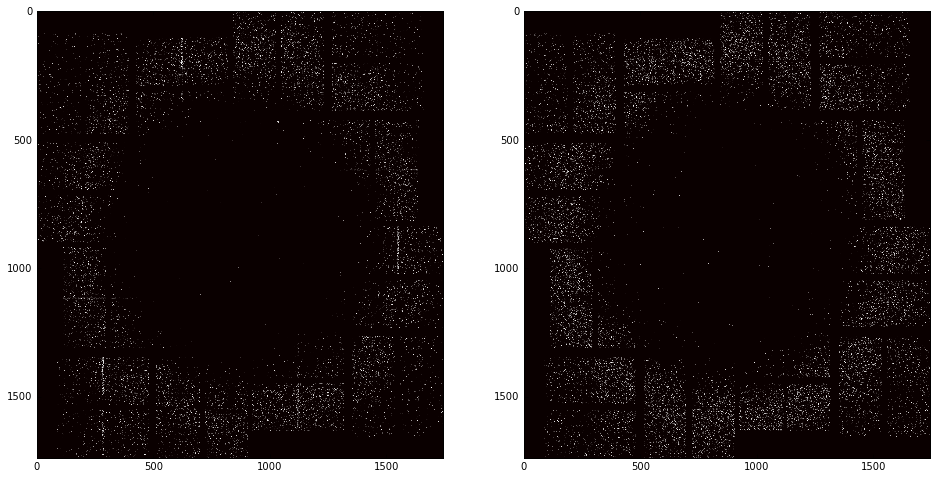

In [19]:
plt.figure(figsize=[16,8])
plt.subplot(121)
threshold = img.mean()+img.std()*3
plt.imshow( img >threshold, 
         aspect='auto', cmap='hot')#,vmin=30,vmax=80)

# threshold = img_correct2.mean()+img.std()*2
plt.subplot(122)
plt.imshow( img_correct2>threshold, 
         aspect='auto', cmap='hot')#,vmin=0,vmax=5)


In [20]:
print img_correct2.std(), img.std()

61.831 29.9845
